In [21]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("portuguese")
plt.style.use('fivethirtyeight')
data = pd.read_csv(r"clean-boatos.org-2021-01-12.csv", encoding="utf-8")
data['Length'] = data['title'].apply(len)
data.groupby('Length').describe().head(20)

Unnamed: 0                                                        \
            count        mean         std    min     25%    50%     75%   
Length                                                                    
46            1.0  848.000000         NaN  848.0  848.00  848.0  848.00   
47            5.0  710.400000   89.226117  669.0  670.00  671.0  672.00   
48            2.0  917.500000    0.707107  917.0  917.25  917.5  917.75   
50            2.0  461.500000  637.103210   11.0  236.25  461.5  686.75   
51            1.0   13.000000         NaN   13.0   13.00   13.0   13.00   
52            1.0  920.000000         NaN  920.0  920.00  920.0  920.00   
54            3.0  184.333333  137.121601   26.0  144.50  263.0  263.50   
55            2.0  513.000000  511.945310  151.0  332.00  513.0  694.00   
56            2.0   95.000000   41.012193   66.0   80.50   95.0  109.50   
57            2.0  879.500000    0.707107  879.0  879.25  879.5  879.75   
58           11.0  237.181818  282.374510    5.0   83.00  120.0  214.50   
59            4.0  123.000000   16.753109  108.0  108.75  123.0  137.25   
60           14.0  314.142857  324.221638   24.0   93.25  146.5  334.75   
61            8.0  305.500000  299.970951   22.0   60.50  208.5  510.75   
62           11.0  524.272727  371.004607  118.0  147.50  778.0  844.00   
63           12.0  279.916667  221.750662   25.0  105.00  264.5  456.25   
64           13.0  623.153846  336.890646    2.0  393.00  797.0  876.00   
65            3.0  209.666667  263.122278   43.0   58.00   73.0  293.00   
66            9.0  320.222222  301.706719   34.0  116.00  136.0  510.00   
67           19.0  381.842105  183.447620  130.0  251.50  333.0  531.50   

              classification                                     
          max          count mean  std  min  25%  50%  75%  max  
Length                                                           
46      848.0            1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0  
47      870.0            5.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
48      918.0            2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
50      912.0            2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
51       13.0            1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0  
52      920.0            1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0  
54      264.0            3.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
55      875.0            2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
56      124.0            2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
57      880.0            2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
58      888.0           11.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
59      138.0            4.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
60      914.0           14.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
61      858.0            8.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
62      910.0           11.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
63      679.0           12.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
64      925.0           13.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
65      513.0            3.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
66      906.0            9.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
67      866.0           19.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [22]:
data.head()

,Unnamed: 0,link,date,title,text,classification,Length
0,1,https://www.boatos.org/saude/cadastro-conecte-...,2021-01-09 21:02:08,Cadastro do Conecte SUS será obrigatório para ...,"Pessoal, todo mundo precisa se cadastrar no co...",1,73
1,2,https://www.boatos.org/mundo/cristina-kirchner...,2021-01-09 14:32:34,Cristina Kirchner tomou vacina da Covid-19 sem...,"A vice-presidente argentina, é a primeira mul...",1,64
2,3,https://www.boatos.org/saude/gerson-camarotti-...,2021-01-08 19:13:52,Gerson Camarotti pediu cassação do registro de...,ESTE SAFADO ESTA PEDINDO PARA OS CONSELHOS T...,1,97
3,4,https://www.boatos.org/saude/secretario-saude-...,2021-01-08 16:33:39,Secretário de Saúde de Minas Gerais escreve me...,Mensagem do Secretário Estado Saúde de Minas ...,1,72
4,5,https://www.boatos.org/mundo/presidente-pais-l...,2021-01-07 17:51:58,Presidente de país do Leste Europeu se vacinou...,"OLHEM ISSO, OS GOVERNANTES COMO SEU DÓRIA, EST...",1,58


In [23]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
filtered_jan_mar = data.loc[(data['date'] >= '2020-01-26') & (data['date'] <= '2020-04-01')]
filtered_jan_mar

,Unnamed: 0,link,date,title,text,classification,Length
542,718,https://www.boatos.org/entretenimento/vidente-...,2020-03-31 17:44:16,Vidente espanhola Nube de María previu quarent...,"No dia 24-12-2019, a vidente previu o que ia ...",1,76
543,719,https://www.boatos.org/religiao/pastor-gerson-...,2020-03-31 15:24:05,Pastor Gerson de Macedo (do Maranhão) fez prof...,O pastor Gerson entregou essa profecia antes ...,1,95
544,720,https://www.boatos.org/saude/oms-volta-atras-d...,2020-03-31 14:04:12,"OMS volta atrás, dá razão a Bolsonaro, pede fi...",BOLSONARO TEM RAZÃO: OMS PERCEBEU QUE FEZ BE...,1,107
545,721,https://www.boatos.org/politica/grupo-whatsapp...,2020-03-31 13:26:37,Grupo no WhatsApp Resistência Pará (do PSOL) p...,"“~Resistência Pará Di Psol, ~ niltinho, #Lula...",1,86
546,723,https://www.boatos.org/mundo/video-tv-italiana...,2020-03-31 09:28:51,Vídeo da TV italiana RAI de 2015 prova que o c...,“Em novembro de 2015 a televisão Italiana apr...,1,103
...,...,...,...,...,...,...,...
709,929,https://www.boatos.org/mundo/sopa-morcego-wuha...,2020-01-28 23:18:24,Sopa de morcego que foi consumida em Wuhan (Ch...,“QUE TAL? A disseminação do coronavírus entre...,1,76
710,930,https://www.boatos.org/mundo/sopa-morcego-wuha...,2020-01-28 23:18:24,Sopa de morcego que foi consumida em Wuhan (Ch...,“SOPA DE MORCEGO | Vídeos de pessoas comend...,1,76
711,931,https://www.boatos.org/saude/diretor-do-hc-pre...,2020-01-27 21:51:19,"Diretor do HC, preocupado com nova gripe, reco...",Diretor do HC (Hospital das Clínicas) preocup...,1,89
712,932,https://www.boatos.org/saude/coronavirus-10-mi...,2020-01-26 14:28:59,Coronavírus tem 10 mil casos confirmados Brasi...,URGENTE: VÍRUS DA CHINA ( CORONAVÍRUS) 10 MIL...,1,70


In [24]:
import re
import nltk
nltk.download('punkt')
from nltk import tokenize 
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer(language="portuguese")

filtered_jan_mar['title'] = filtered_jan_mar['title'].apply(word_tokenize)
filtered_jan_mar['title'] = filtered_jan_mar['title'].apply(lambda x: ' '.join([snowball.stem(y) for y in x]))
print(filtered_jan_mar['title'])


542    vident espanhol nub de marí prev quarenten em ...
543    pastor gerson de maced ( do maranhã ) fez prof...
544    oms volt atrás , dá razã a bolsonar , ped fim ...
545    grup no whatsapp resistent par ( do psol ) pla...
546    víd da tv italian rai de 2015 prov que o coron...
                             ...                        
709    sop de morceg que foi consum em wuhan ( chin )...
710    sop de morceg que foi consum em wuhan ( chin )...
711    diretor do hc , preocup com nov grip , recomen...
712    coronavírus tem 10 mil cas confirm brasil e 28...
713    coronavírus tem 2,8 milhõ de infect e mat 112 ...
Name: title, Length: 172, dtype: object


[nltk_data] Downloading package punkt to /home/daniela/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/tmp/ipykernel_6638/1672737613.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jan_mar['title'] = filtered_jan_mar['title'].apply(word_tokenize)
/tmp/ipykernel_6638/1672737613.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jan_mar['title'] = filtered_jan_mar['title'].apply(lambda x: ' '.join([snowball.stem(y) for y in x]))


In [25]:
import texthero as hero # text hero  
filtered_jan_mar["PCA"] = (
            filtered_jan_mar['title']
            .pipe(hero.clean)
            .pipe(hero.tfidf) # term frequency and inverse document frequency 
            .pipe(hero.pca)
)

/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:105: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, symbols)
/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:661: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, "")
/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:173: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(rf"([{string.punctuation}])+", symbol)
/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:693: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, r"\2 \3 \4 \5").str.split()
/home/daniela/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Fun

In [26]:
filtered_jan_mar

,Unnamed: 0,link,date,title,text,classification,Length,PCA
542,718,https://www.boatos.org/entretenimento/vidente-...,2020-03-31 17:44:16,vident espanhol nub de marí prev quarenten em ...,"No dia 24-12-2019, a vidente previu o que ia ...",1,76,"[0.22802132781672324, -0.988457502716237]"
543,719,https://www.boatos.org/religiao/pastor-gerson-...,2020-03-31 15:24:05,pastor gerson de maced ( do maranhã ) fez prof...,O pastor Gerson entregou essa profecia antes ...,1,95,"[1.3429112408297508, -0.5411694693269538]"
544,720,https://www.boatos.org/saude/oms-volta-atras-d...,2020-03-31 14:04:12,"oms volt atrás , dá razã a bolsonar , ped fim ...",BOLSONARO TEM RAZÃO: OMS PERCEBEU QUE FEZ BE...,1,107,"[1.8434579424436346, 2.8176672559101457]"
545,721,https://www.boatos.org/politica/grupo-whatsapp...,2020-03-31 13:26:37,grup no whatsapp resistent par ( do psol ) pla...,"“~Resistência Pará Di Psol, ~ niltinho, #Lula...",1,86,"[0.459949501402296, -1.8570767556466625]"
546,723,https://www.boatos.org/mundo/video-tv-italiana...,2020-03-31 09:28:51,víd da tv italian rai de 2015 prov que o coron...,“Em novembro de 2015 a televisão Italiana apr...,1,103,"[-1.7761053538684102, 2.897853303472199]"
...,...,...,...,...,...,...,...,...
709,929,https://www.boatos.org/mundo/sopa-morcego-wuha...,2020-01-28 23:18:24,sop de morceg que foi consum em wuhan ( chin )...,“QUE TAL? A disseminação do coronavírus entre...,1,76,"[-0.9872093067805363, 0.4382122054865625]"
710,930,https://www.boatos.org/mundo/sopa-morcego-wuha...,2020-01-28 23:18:24,sop de morceg que foi consum em wuhan ( chin )...,“SOPA DE MORCEGO | Vídeos de pessoas comend...,1,76,"[-0.9872093067805363, 0.4382122054865625]"
711,931,https://www.boatos.org/saude/diretor-do-hc-pre...,2020-01-27 21:51:19,"diretor do hc , preocup com nov grip , recomen...",Diretor do HC (Hospital das Clínicas) preocup...,1,89,"[-0.29815109184529576, -1.7145178402253292]"
712,932,https://www.boatos.org/saude/coronavirus-10-mi...,2020-01-26 14:28:59,coronavírus tem 10 mil cas confirm brasil e 28...,URGENTE: VÍRUS DA CHINA ( CORONAVÍRUS) 10 MIL...,1,70,"[-0.3438357179481947, -0.6403764101365202]"


# K-MEANS


In [27]:
filtered_jan_mar['PCA']

542      [0.22802132781672324, -0.988457502716237]
543      [1.3429112408297508, -0.5411694693269538]
544       [1.8434579424436346, 2.8176672559101457]
545       [0.459949501402296, -1.8570767556466625]
546       [-1.7761053538684102, 2.897853303472199]
                          ...                     
709      [-0.9872093067805363, 0.4382122054865625]
710      [-0.9872093067805363, 0.4382122054865625]
711    [-0.29815109184529576, -1.7145178402253292]
712     [-0.3438357179481947, -0.6403764101365202]
713     [-0.6895633457989455, 0.07717146486331158]
Name: PCA, Length: 172, dtype: object

In [28]:
finalModel = filtered_jan_mar['PCA']
finalModel = np.array((list(finalModel)))
finalModel

array([[ 2.28021328e-01, -9.88457503e-01],
       [ 1.34291124e+00, -5.41169469e-01],
       [ 1.84345794e+00,  2.81766726e+00],
       [ 4.59949501e-01, -1.85707676e+00],
       [-1.77610535e+00,  2.89785330e+00],
       [-1.77610535e+00,  2.89785330e+00],
       [-1.74661701e-03, -1.10339432e+00],
       [ 1.52000556e+01,  3.39341866e+00],
       [ 1.52000556e+01,  3.39341866e+00],
       [ 1.52000556e+01,  3.39341866e+00],
       [ 1.52000556e+01,  3.39341866e+00],
       [-1.60202472e+00,  1.48843384e+00],
       [-9.89914271e-01,  1.04922723e+00],
       [-2.44330581e-02, -2.16790381e+00],
       [-8.40237749e-01, -2.74251781e-01],
       [-1.05891825e-01,  5.04172409e-01],
       [ 2.19279985e-01,  2.65112321e+00],
       [ 9.79075177e-01,  1.71894667e+00],
       [-2.73835213e-03, -1.16631477e+00],
       [-2.73835213e-03, -1.16631477e+00],
       [-8.94774350e-01, -7.36855693e-01],
       [ 1.47915865e-01, -1.81874471e-01],
       [-6.10352213e-01, -3.25481843e+00],
       [-1.

In [29]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(finalModel)
    kmeanModel.fit(finalModel)
  
    distortions.append(sum(np.min(cdist(finalModel, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / finalModel.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(finalModel, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / finalModel.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 2.1465656939848827
2 : 1.710879059567803
3 : 1.3229772511557443
4 : 1.0189314559534188
5 : 0.8362089484429341
6 : 0.745547501677684
7 : 0.6842936205456442
8 : 0.6000998427129604
9 : 0.5286117850682082


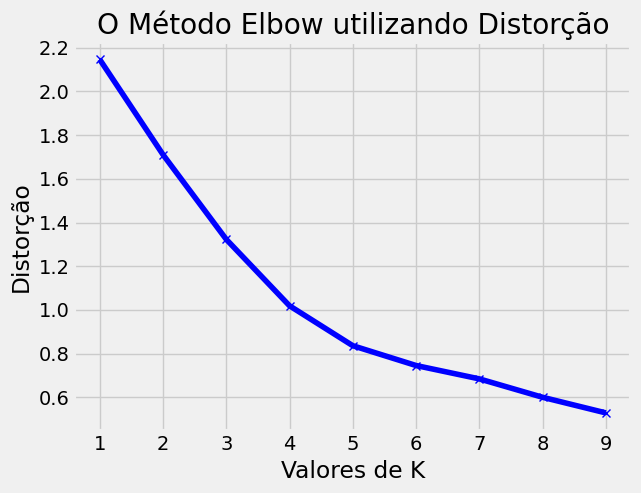

In [30]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Distorção')
plt.title('O Método Elbow utilizando Distorção')
plt.show()

In [31]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 2041.4566290666876
2 : 1048.1280452465264
3 : 493.9767841369571
4 : 302.5408248158957
5 : 215.1892246002847
6 : 161.90189646659763
7 : 120.92294206788984
8 : 94.5134863718463
9 : 74.69424001010998


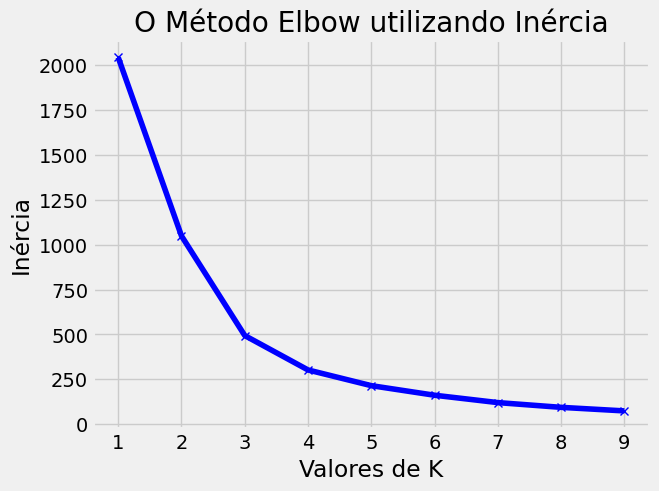

In [32]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Inércia')
plt.title('O Método Elbow utilizando Inércia')
plt.show()

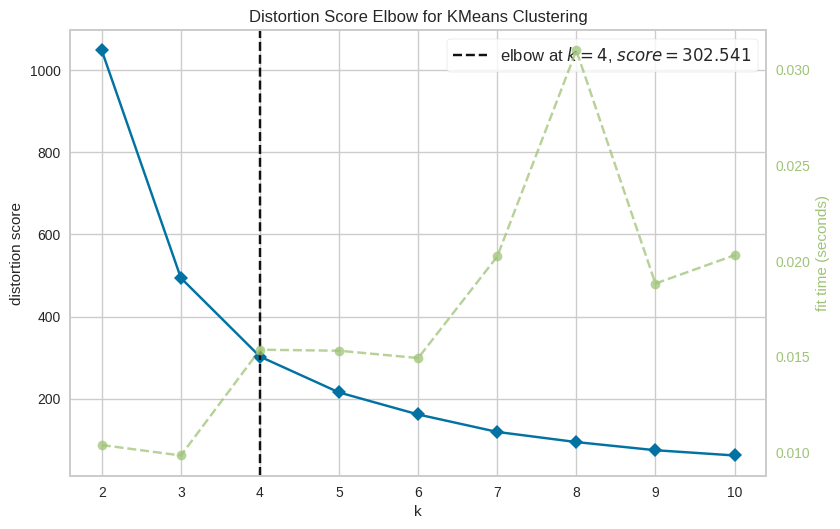

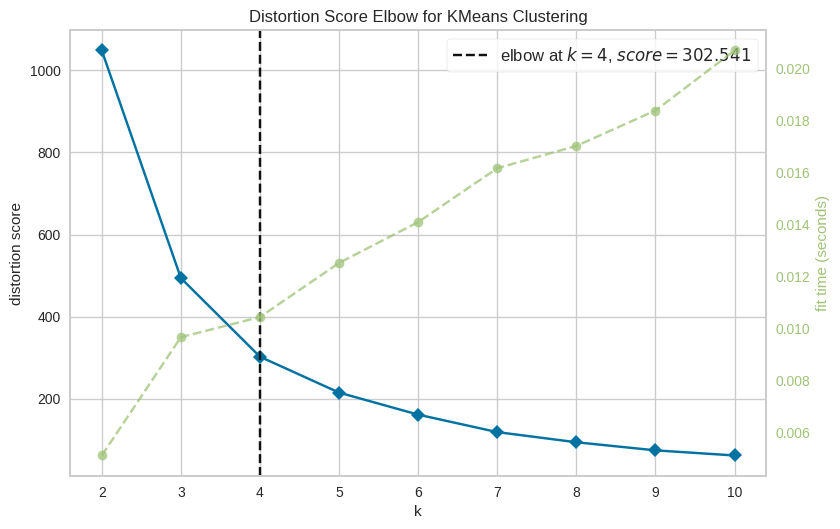

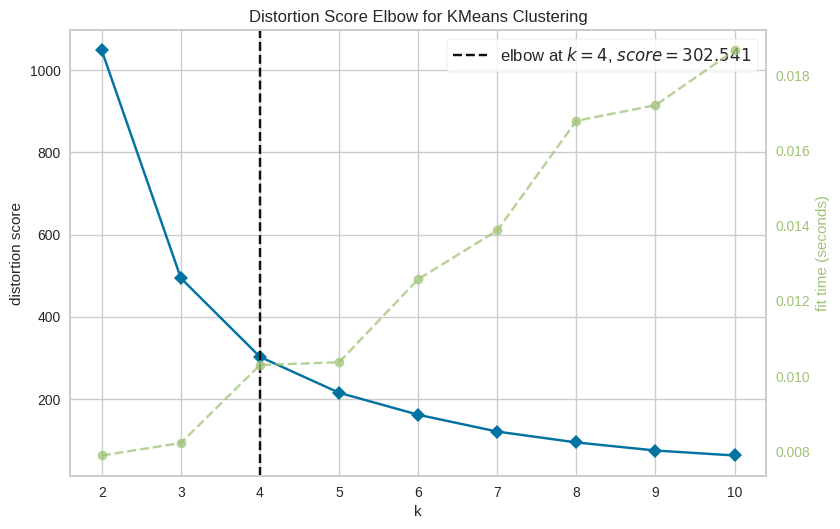

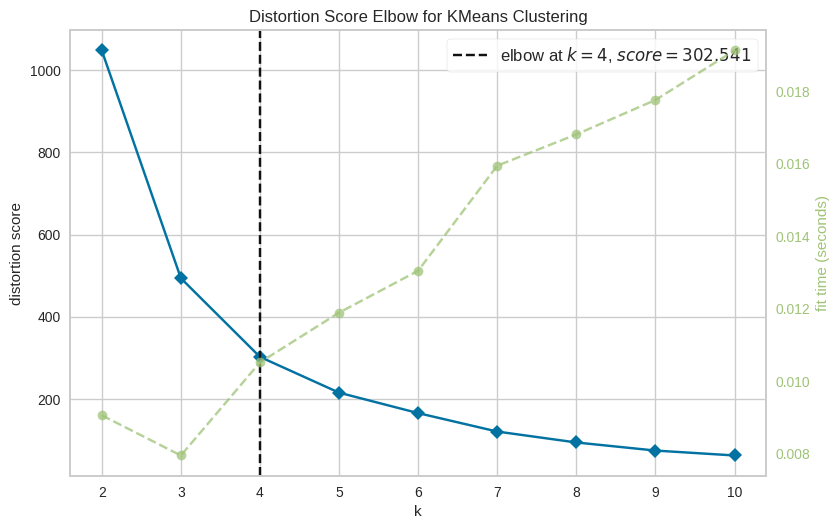

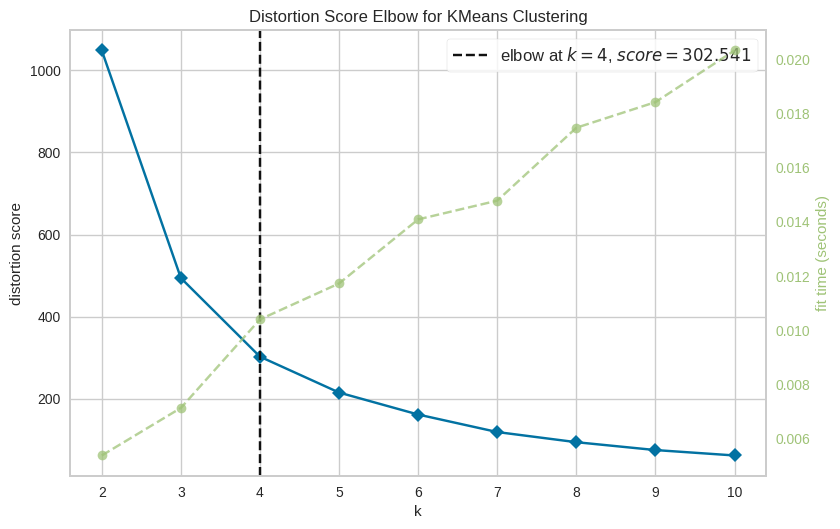

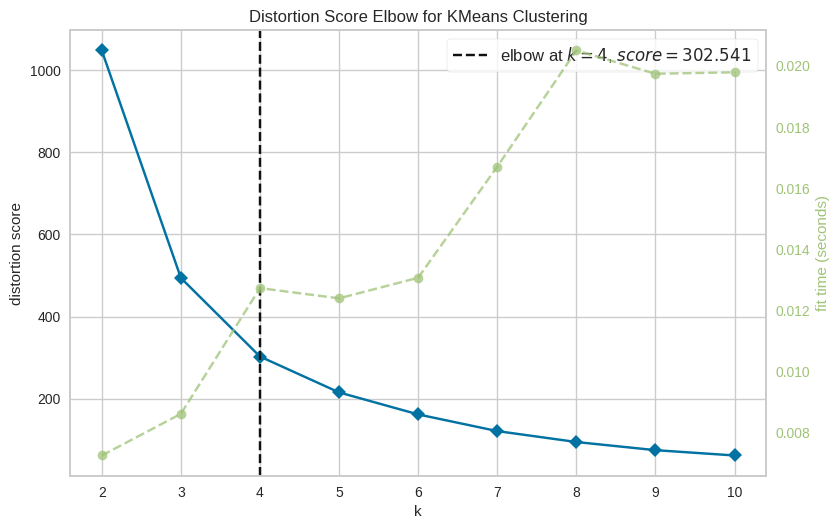

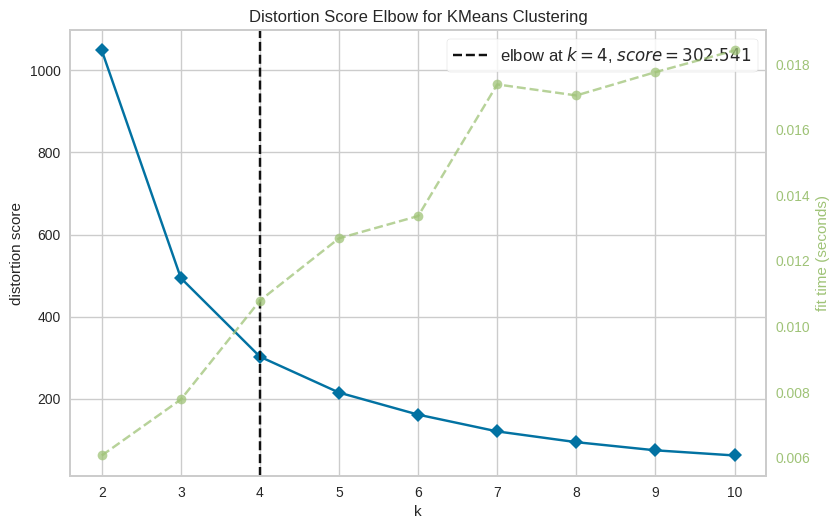

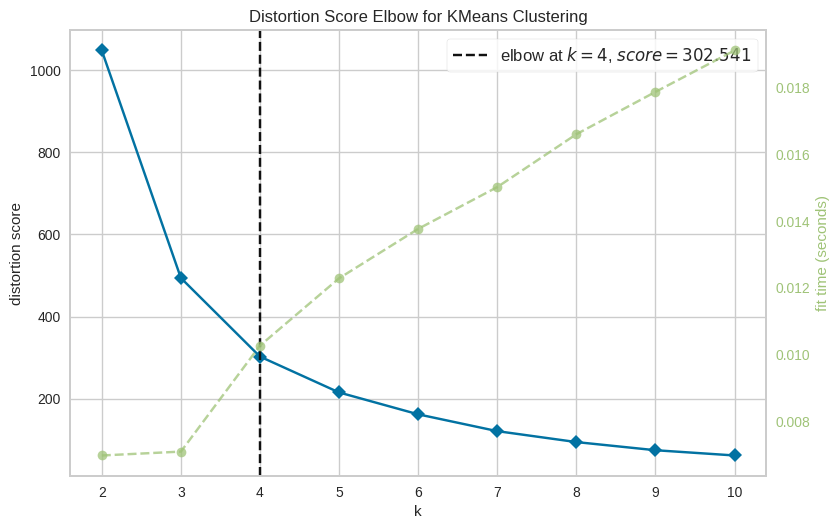

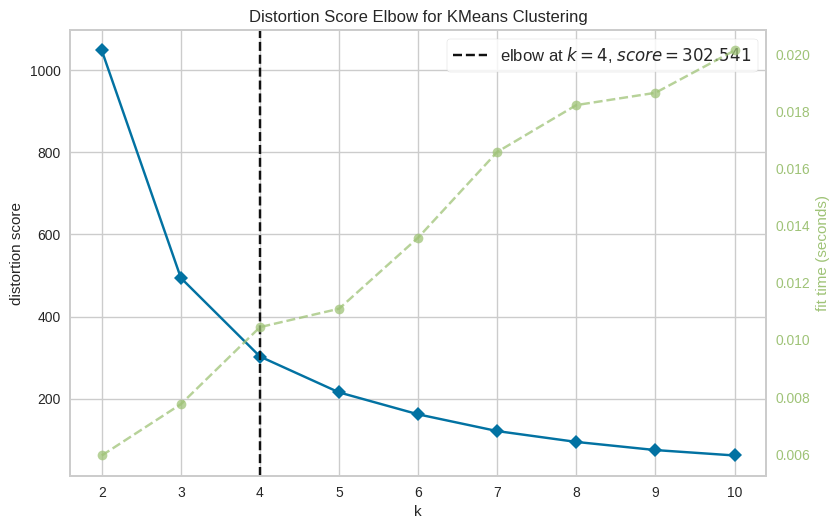

In [33]:
from yellowbrick.cluster import KElbowVisualizer

silModel = filtered_jan_mar['PCA']
silModel = np.array((list(silModel)))
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(silModel)
    elb_visualizer = KElbowVisualizer(kmeanModel)
    elb_visualizer.fit(silModel)    
    elb_visualizer.show()  

## k = 4

[3 3 0 3 0 0 3 1 1 1 1 0 0 3 3 0 0 0 3 3 3 3 3 0 0 3 0 3 3 3 3 3 3 0 3 3 3
 0 0 0 0 2 2 2 2 2 3 3 3 3 0 0 0 3 3 0 0 0 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3
 0 0 3 3 3 0 3 3 3 3 3 3 0 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 0 3 3 0 0 0 3 3 3
 0 3 3 0 0 3 3 3 3 3 3 3 0 3 0 3 3 3 3 3 3 3 0 0 3 3 3 3 0 3 3 3 3 3 3 3 3
 3 0 3 0 0 0 3 3 0 0 3 3 3 3 0 3 3 3 3 0 0 3 3 3]


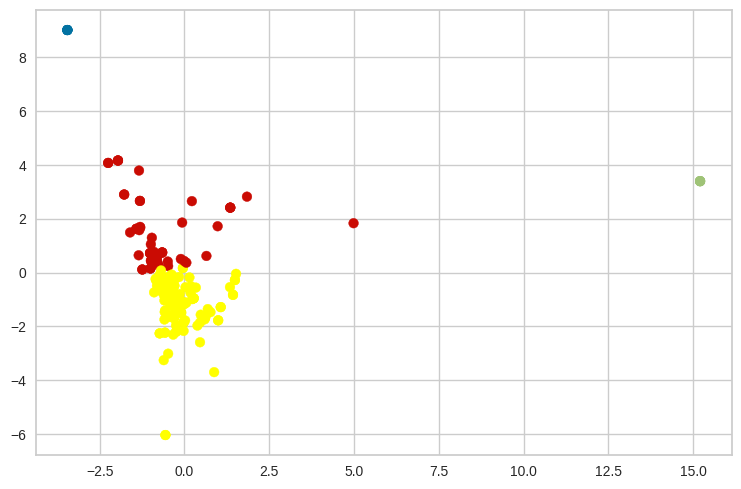

In [34]:
finalModel2 = filtered_jan_mar['PCA']
finalModel2 = np.array((list(finalModel)))
finalModel2

kmeanModel2 = KMeans(n_clusters=4).fit(finalModel2)
kmeanModel2.fit(finalModel2)

print(kmeanModel2.labels_)


LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b', 3: 'yellow'}
label_color = [LABEL_COLOR_MAP[l] for l in kmeanModel2.labels_]
plt.scatter(finalModel2[:,0], finalModel2[:,1], c=label_color)

In [65]:
# results=kmeanModel2.labels_.reshape(kmeanModel2.labels_.shape[0],1)
# results = np.array(((results)))
# results
kmeanModel2.labels_

array([3, 3, 0, 3, 0, 0, 3, 1, 1, 1, 1, 0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3,
       3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3], dtype=int32)

In [75]:
array2 = np.array((list(filtered_jan_mar["title"])))
array2

array(['vident espanhol nub de marí prev quarenten em program de 24/12/2019',
       'pastor gerson de maced ( do maranhã ) fez profec sobr a human em áudi antes de morr',
       'oms volt atrás , dá razã a bolsonar , ped fim do isol social e quer que pesso volt ao trabalh',
       'grup no whatsapp resistent par ( do psol ) planej infect pesso com coronavírus',
       'víd da tv italian rai de 2015 prov que o coronavírus ( covid-19 ) foi cri em laboratóri na chin',
       'víd da tv italian rai de 2015 prov que o coronavírus ( covid-19 ) foi cri em laboratóri na chin',
       'descubr se voc tem direit ao auxíli emergencial compartilh link no whatsapp',
       'ricard cert , assessor de camil santan , grav áudi par sistem verd mar ped ataqu a bolsonar no cear',
       'ricard cert , assessor de camil santan , grav áudi par sistem verd mar ped ataqu a bolsonar no cear',
       'ricard cert , assessor de camil santan , grav áudi par sistem verd mar ped ataqu a bolsonar no cear',
       

In [134]:
pred_classes = kmeanModel2.predict(finalModel2)
pred_classes = list(pred_classes)

dictionaryPrime = dict(zip(filtered_jan_mar["title"], pred_classes))
dictionaryPrime

{'vident espanhol nub de marí prev quarenten em program de 24/12/2019': 3,
 'pastor gerson de maced ( do maranhã ) fez profec sobr a human em áudi antes de morr': 3,
 'oms volt atrás , dá razã a bolsonar , ped fim do isol social e quer que pesso volt ao trabalh': 0,
 'grup no whatsapp resistent par ( do psol ) planej infect pesso com coronavírus': 3,
 'víd da tv italian rai de 2015 prov que o coronavírus ( covid-19 ) foi cri em laboratóri na chin': 0,
 'descubr se voc tem direit ao auxíli emergencial compartilh link no whatsapp': 3,
 'ricard cert , assessor de camil santan , grav áudi par sistem verd mar ped ataqu a bolsonar no cear': 1,
 'revist de virolog afirm que ph do nov coronavírus é ácid e que dev com aliment alcalin': 0,
 'band saiu do ar porqu daten anunc a cur do coronavírus e receb ligaçã misteri da chin': 0,
 'borracheir morr em acident com pneu , mas foi diagnostic com covid-19 par inflar estatíst do coronavírus': 3,
 'caf ou chá cur e previn o coronavírus , diz médic li 

In [137]:
clusterOneWords = [k for k, v in dictionaryPrime.items() if v == 0]
clusterOneWords


['oms volt atrás , dá razã a bolsonar , ped fim do isol social e quer que pesso volt ao trabalh',
 'víd da tv italian rai de 2015 prov que o coronavírus ( covid-19 ) foi cri em laboratóri na chin',
 'revist de virolog afirm que ph do nov coronavírus é ácid e que dev com aliment alcalin',
 'band saiu do ar porqu daten anunc a cur do coronavírus e receb ligaçã misteri da chin',
 'fernand torr diss que torc par que o coronavírus mat muit brasileir',
 'don da red atacadã e carrefour ped fim da quarenten e diz que vai demit 60 % dos funcionári',
 'chef de rotin do hospital de acar ( ronald gazoll ) ped que as pesso sai às ruas e volt ao trabalh',
 'estud da univers de hamburg apont que coronavírus é men perig que outr doenc',
 'ricard amorim grav áudi ped o fim da quarenten e apoi bolsonar',
 'govern de nov york ( eua ) diss que as pesso precis volt ao trabalh e volt atrás no lockdown',
 'ministr da educ abrah weintraub ped que crianc volt às aul nas escol , mostr víd',
 'h1n1 ( grip suín )

## Word Cloud for first cluster n = 0

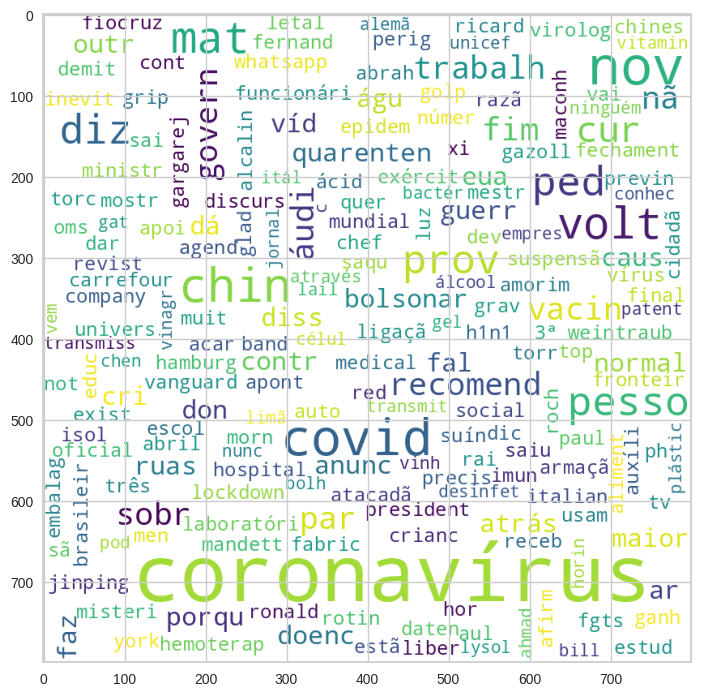

In [147]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

custom_stop_words = ['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'é', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'à', 'seu', 'sua', 'ou', 'ser', 'quando', 'muito', 'há', 'nos', 'já', 'está', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'era', 'depois', 'sem', 'mesmo', 'aos', 'ter', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'estão', 'você', 'tinha', 'foram', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'têm', 'numa', 'pelos', 'elas', 'havia', 'seja', 'qual', 'será', 'nós', 'tenho', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'fosse', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos', 'estiverem', 'hei', 'há', 'havemos', 'hão', 'houve', 'houvemos', 'houveram', 'houvera', 'houvéramos', 'haja', 'hajamos', 'hajam', 'houvesse', 'houvéssemos', 'houvessem', 'houver', 'houvermos', 'houverem', 'houverei', 'houverá', 'houveremos', 'houverão', 'houveria', 'houveríamos', 'houveriam', 'sou', 'somos', 'são', 'era', 'éramos', 'eram', 'fui', 'foi', 'fomos', 'foram', 'fora', 'fôramos', 'seja', 'sejamos', 'sejam', 'fosse', 'fôssemos', 'fossem', 'for', 'formos', 'forem', 'serei', 'será', 'seremos', 'serão', 'seria', 'seríamos', 'seriam', 'tenho', 'tem', 'temos', 'tém', 'tinha', 'tínhamos', 'tinham', 'tive', 'teve', 'tivemos', 'tiveram', 'tivera', 'tivéramos', 'tenha', 'tenhamos', 'tenham', 'tivesse', 'tivéssemos', 'tivessem', 'tiver', 'tivermos', 'tiverem', 'terei', 'terá', 'teremos', 'terão', 'teria', 'teríamos', 'teriam']
unique_string=(" ").join(clusterOneWords)
wordCloudOne = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudOne)

## Word Cloud for first cluster n = 1

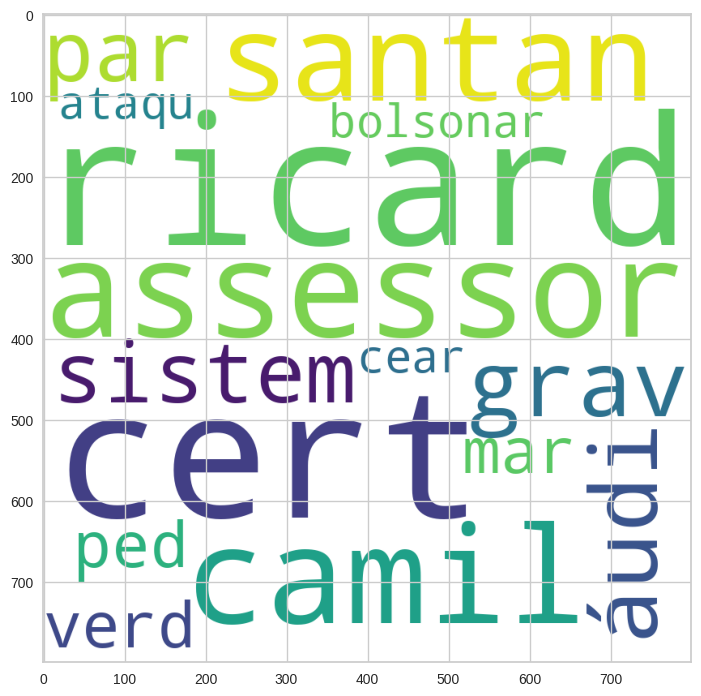

In [149]:
clusterTwoWords = [k for k, v in dictionaryPrime.items() if v == 1]

unique_string2=(" ").join(clusterTwoWords)
wordCloudTwo = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string2)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudTwo)

## Word Cloud for first cluster n = 2

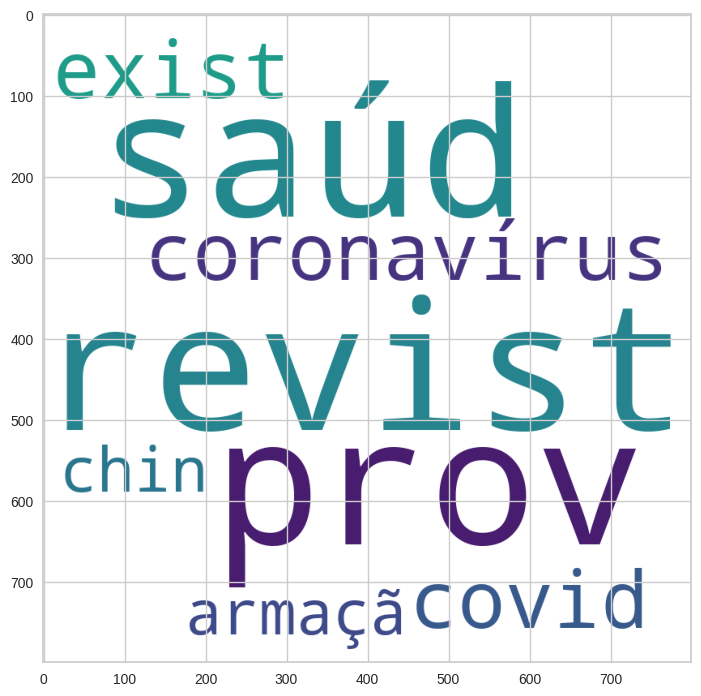

In [155]:
clusterThreeWords = [k for k, v in dictionaryPrime.items() if v == 2]

unique_string3=(" ").join(clusterThreeWords)

wordCloudThree = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string3)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudThree)